<a href="https://colab.research.google.com/github/codebybishwa/Stock_trend_data_analysis/blob/main/stock_price_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

stock_data = pd.read_csv('/content/infy_stock.csv')

stock_data.head(10)

# Check for missing values
print(stock_data.isnull().sum())

# Handle missing values if any
stock_data = stock_data.dropna()


Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64


In [13]:
stock_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
5,1996-01-08,0.784179,0.791015,0.785156,0.789062,0.544229,358400.0
6,1996-01-09,0.789062,0.781250,0.771484,0.780273,0.538167,870400.0
7,1996-01-10,0.780273,0.775390,0.771484,0.773437,0.533452,358400.0
8,1996-01-11,0.779296,0.791015,0.773437,0.791015,0.545576,819200.0
9,1996-01-12,0.787109,0.787109,0.781250,0.786621,0.542545,358400.0


## **Data Visualization**

### 1. Closing price over time

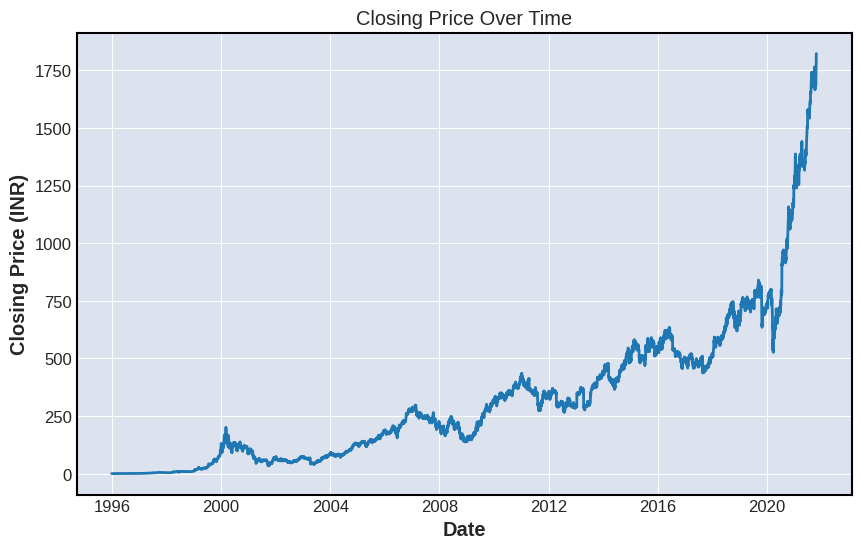

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=stock_data)
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.show()

### 2.  A candlestick chart

In [15]:
!pip install mplfinance

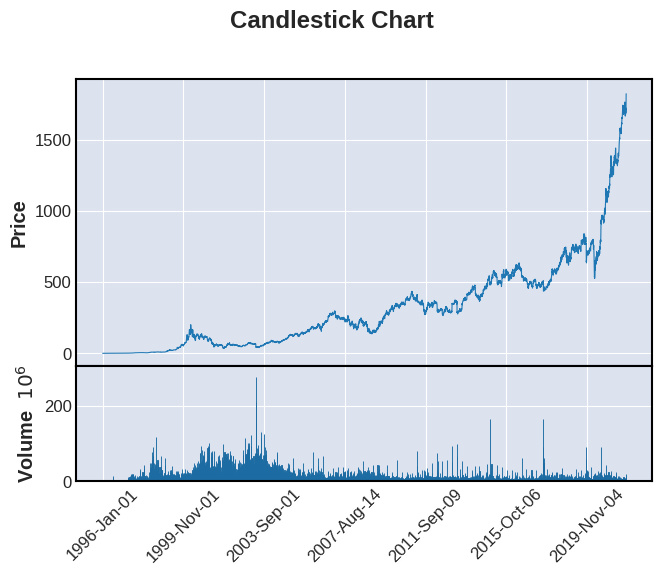

In [21]:
import mplfinance as mpf
import pandas as pd

stock_data = stock_data.reset_index()  # Resets index, bringing 'Date' back as a column
stock_data.set_index('Date', inplace=True)

mpf.plot(stock_data, type='line', volume=True, title='Candlestick Chart')

## **Statistical Analysis**

### 1. % Daily return

In [24]:
stock_data['Daily_Return'] = ((stock_data['Close'] - stock_data['Open']) / stock_data['Open']) * 100

stock_data[['Open', 'Close', 'Daily_Return']].head()


,Open,Close,Daily_Return
Date,,,
1996-01-01,0.794921,0.796679,0.221154
1996-01-02,0.794921,0.793457,-0.184169
1996-01-03,0.798828,0.798828,0.000000
1996-01-04,0.791015,0.793554,0.320980
1996-01-05,0.784179,0.784179,0.000000


### 2. Average and median of daily returns

In [26]:
average_daily_return = stock_data['Daily_Return'].mean()
median_daily_return = stock_data['Daily_Return'].median()

print(f'Average Daily Return: {average_daily_return:.2f}%')
print(f'Median Daily Return: {median_daily_return:.2f}%')


Average Daily Return: 0.03%
Median Daily Return: 0.00%


### Standard deviation of the closing prices

In [27]:
std_close_price = stock_data['Close'].std()

print(f'Standard Deviation of Closing Prices: {std_close_price:.2f}')

Standard Deviation of Closing Prices: 317.49


## **Moving Averages:**

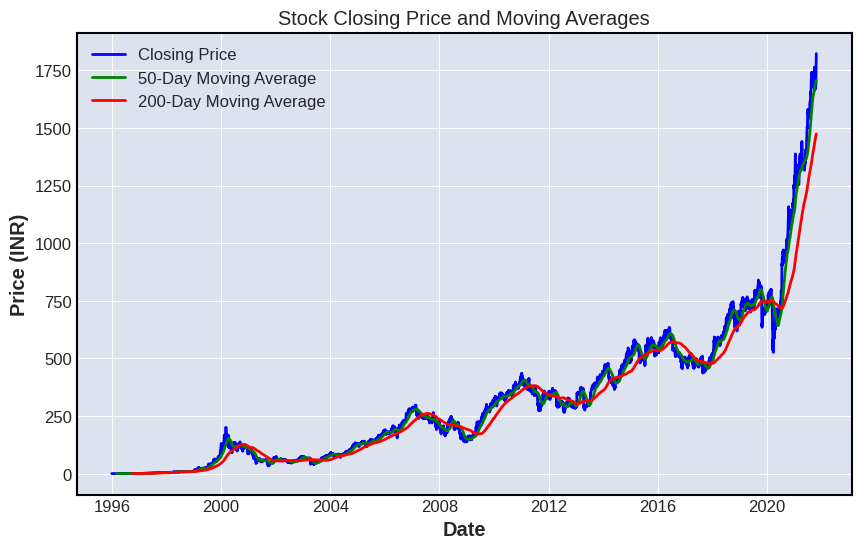

In [28]:
# 50-day and 200-day moving averages
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
plt.plot(stock_data.index, stock_data['50_MA'], label='50-Day Moving Average', color='green')
plt.plot(stock_data.index, stock_data['200_MA'], label='200-Day Moving Average', color='red')
plt.title('Stock Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


## **Volatility Analysis**

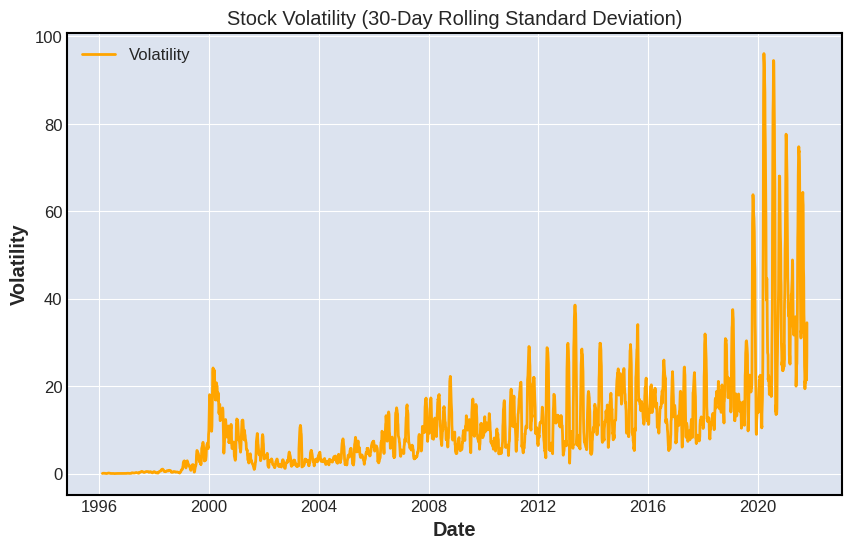

In [29]:
# 30-day rolling standard deviation for volatility
stock_data['Volatility'] = stock_data['Close'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Volatility'], label='Volatility', color='orange')
plt.title('Stock Volatility (30-Day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## **Trend Analysis (Bullish and Bearish Trends)**

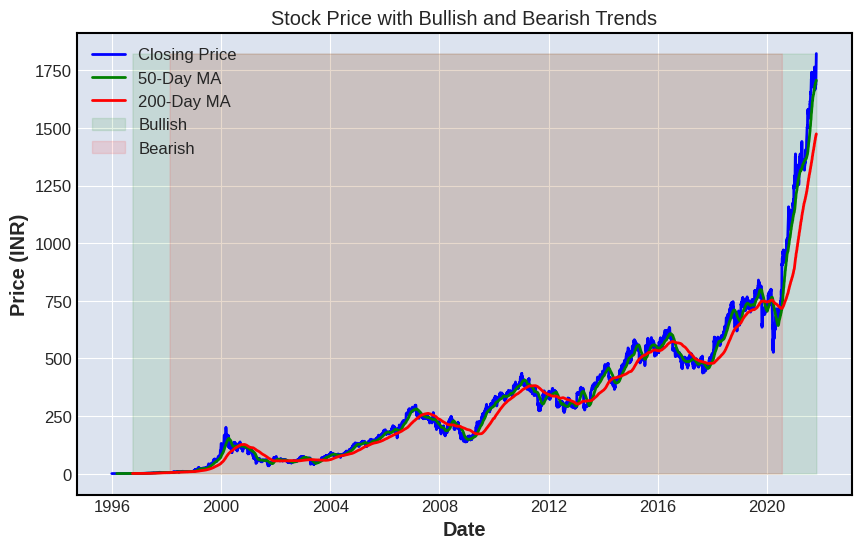

In [30]:
# Identify bullish (50_MA > 200_MA) and bearish trends (50_MA < 200_MA)
stock_data['Trend'] = 'Neutral'
stock_data.loc[stock_data['50_MA'] > stock_data['200_MA'], 'Trend'] = 'Bullish'
stock_data.loc[stock_data['50_MA'] < stock_data['200_MA'], 'Trend'] = 'Bearish'

# Plot the trends along with the moving averages
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
plt.plot(stock_data.index, stock_data['50_MA'], label='50-Day MA', color='green')
plt.plot(stock_data.index, stock_data['200_MA'], label='200-Day MA', color='red')

# Highlight bullish and bearish trends
bullish_dates = stock_data[stock_data['Trend'] == 'Bullish'].index
bearish_dates = stock_data[stock_data['Trend'] == 'Bearish'].index
plt.fill_between(bullish_dates, stock_data['Close'].min(), stock_data['Close'].max(), color='green', alpha=0.1, label='Bullish')
plt.fill_between(bearish_dates, stock_data['Close'].min(), stock_data['Close'].max(), color='red', alpha=0.1, label='Bearish')

plt.title('Stock Price with Bullish and Bearish Trends')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()